# **Food Delivery Time Prediction**

### **1. Import Pandas, Numpy, Matplotlib, Seaborn, pickel, sklearn**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


### **2. Importing CSV file into Python as a Pandas Dataframe.**


In [3]:
df = pd.read_csv("G:\\Final_Projects\\Machine_Learning\\Project2\\Food_Delivery_Time_Predictor\\Dataset\\Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68



 ### **Here are the columns and their purposes :-** 


**1. Order_ID -** Unique identifier for each food delivery order.   
**2. Distance_km -** Distance between the restaurant and customer in kilometers. This directly influences the delivery time.   
**3. Weather -** Weather conditions during delivery (e.g., Sunny, Rainy, Snowy) which can delay delivery.   
**4. Traffic_Level -** Describes how congested the roads are (e.g., Low, Medium, High, Jammed).   
**5. Time_of_Day -** Period of the day when the delivery is scheduled (e.g., Morning, Afternoon, Night).   
**6. Vehicle_Type -** Type of vehicle used for delivery (e.g., Bike, Scooter, Car), which affects speed.  
**7. Preparation_Time_min -** Time (in minutes) taken by the restaurant to prepare the order.   
**8. Courier_Experience_yrs -** Number of years the delivery person has been working. More experienced couriers may be quicker.   
**9. Delivery_Time_min –** Time (in minutes) taken to deliver the order from dispatch to delivery.   


### **3.  Getting Basic Information About Dataset.**

In [5]:
df.shape

(1000, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [35]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [36]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

### **Conclution :-**

**The Dataset has 1000 entries across 9 columns. Some data types are likely integers, floats, objects and some Feature (column) has null values such as Weather , Traffic_Level , Time_of_Day, and Courier_Experience_yrs**

In [37]:
df = df.dropna()

### 4. **Performing Data Cleaing And EDA Process For Better Understanding Of Data.**

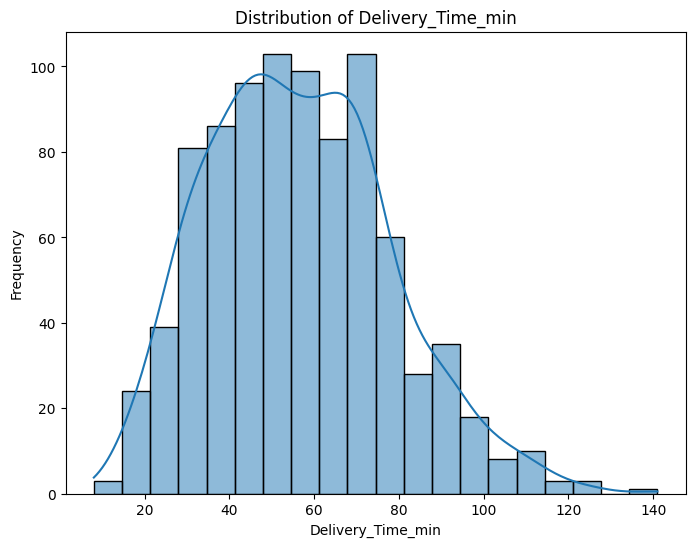

In [38]:

# Univariate analysis: Distribution of Delivery_Time_min
plt.figure(figsize=(8, 6))
sns.histplot(df['Delivery_Time_min'], bins=20, kde=True)
plt.title('Distribution of Delivery_Time_min')
plt.xlabel('Delivery_Time_min')
plt.ylabel('Frequency')
plt.show()

### **Conclution :-**

Delivery Time Distribution

   - The Delivery_Time_min follows a slightly right-skewed distribution, meaning most deliveries are completed in around 40–70 minutes, but a few deliveries take much longer (up to 140 minutes).

   - This suggests that while most deliveries are fairly predictable, outliers or unusual delays do occur.

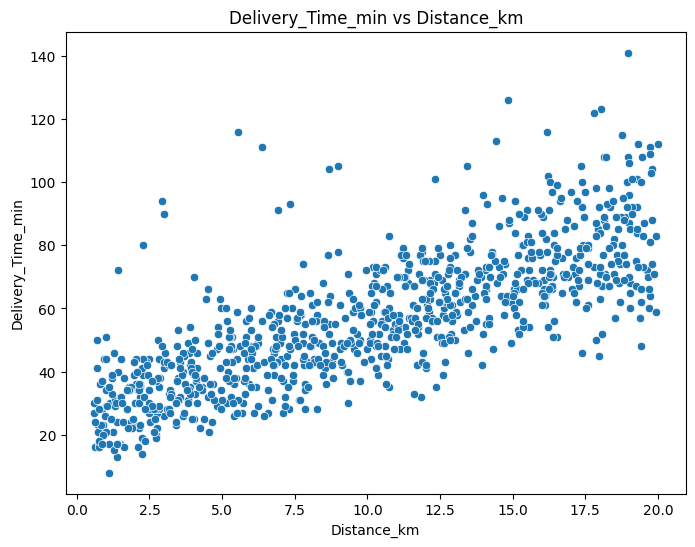

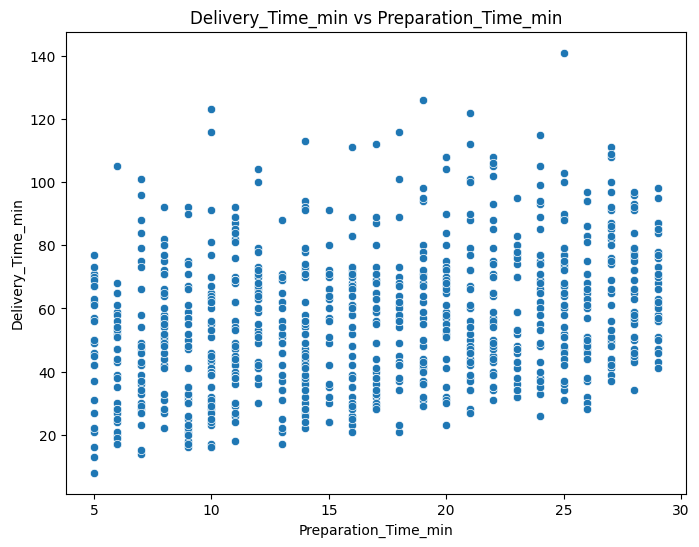

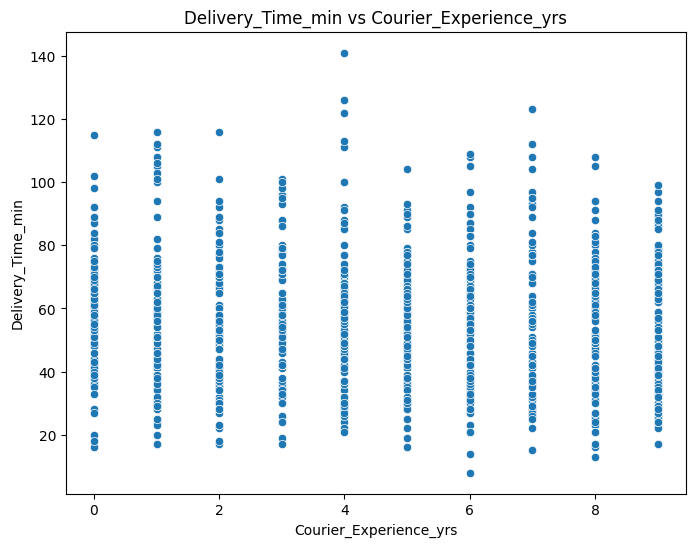

In [39]:

# Visualize relationship between numerical features and Delivery_Time_min
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[feature], y=df['Delivery_Time_min'])
    plt.title('Delivery_Time_min vs ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Delivery_Time_min')
    plt.show()

### **Conclution :-**

1.  **Impact of Distance**
    - There is a strong positive correlation (0.78) between Distance_km and Delivery_Time_min.
    - The scatter plot shows a clear upward trend as the distance increases, delivery time also increases.
    - This makes logical sense and highlights that distance is the most significant factor affecting delivery duration.

2. **Impact of Preparation Time**
    - Preparation_Time_min shows a moderate positive correlation (0.30) with delivery time.
    - The plot indicates some upward trend, but it's not very strong.
    - This means that while longer preparation times can delay the overall delivery, the impact is not as significant as the distance.

3. **Impact of Courier Experience**
    - Courier_Experience_yrs has a very weak negative correlation (-0.077) with delivery time.
    - The scatter plot shows that delivery times are spread almost equally across different levels of experience.
    - This suggests that courier experience does not have a significant influence on delivery duration — possibly due to external factors like traffic, distance, or restaurant delays.



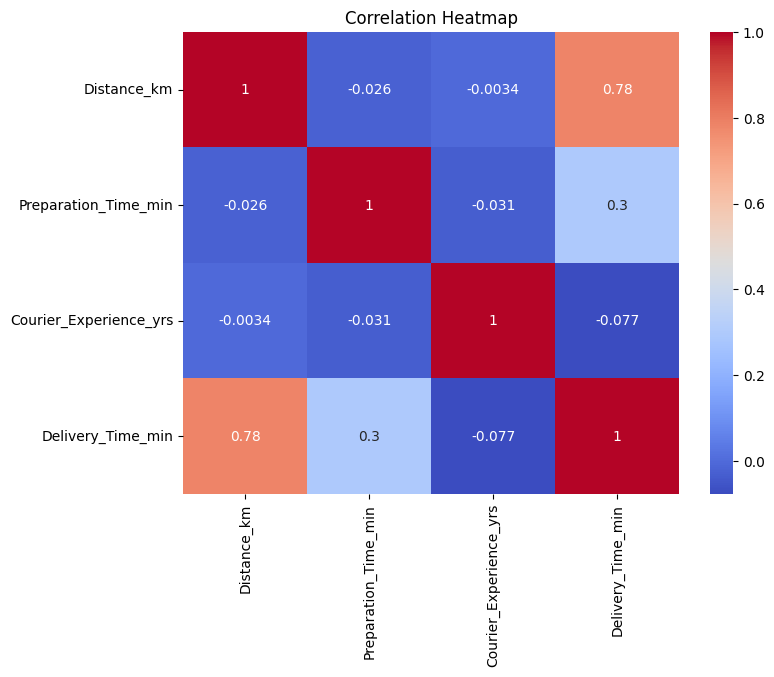

In [40]:

# Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
correlation = df[numerical_features + ['Delivery_Time_min']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **Conclution :-**

-  Distance is the main factor contributing to delivery time.

- Preparation time also plays a role, though to a lesser extent.

- Courier experience has minimal impact — it’s not a reliable predictor for delivery time in this dataset.



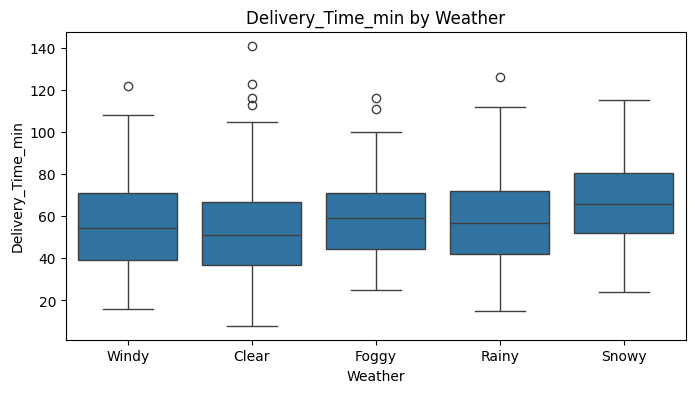

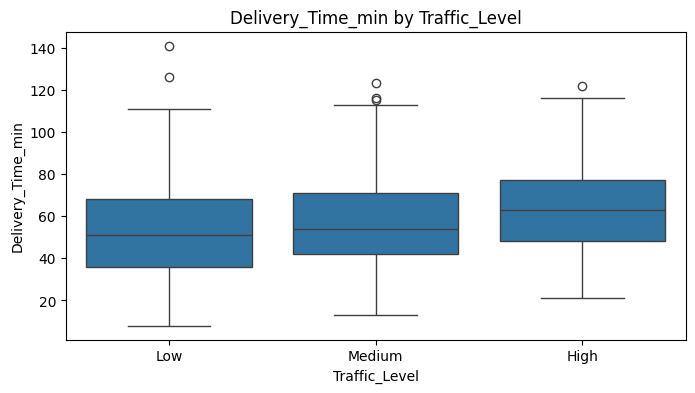

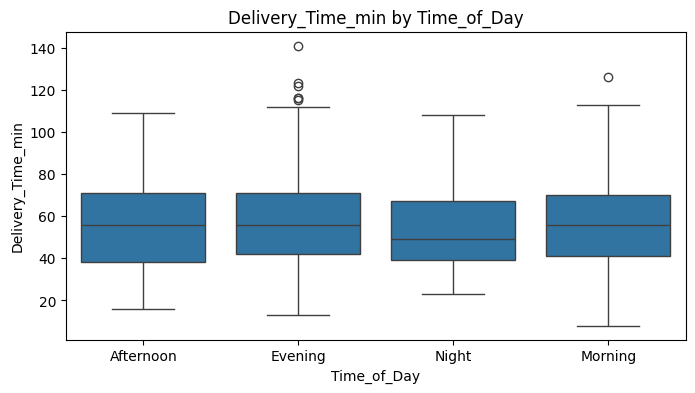

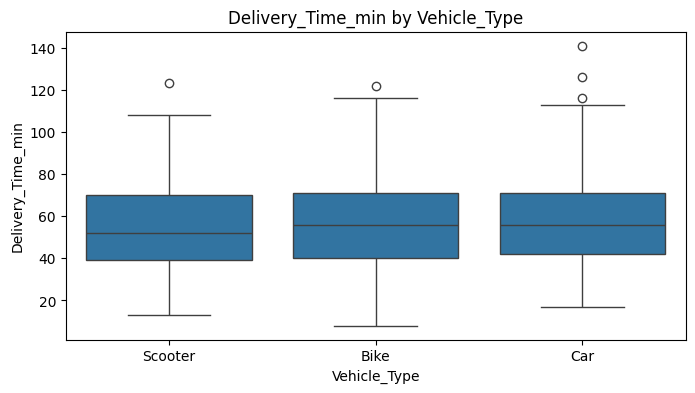

In [41]:

# Categorical features analysis
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for cat in categorical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=cat, y='Delivery_Time_min', data=df)
    plt.title('Delivery_Time_min by ' + cat)
    plt.xlabel(cat)
    plt.ylabel('Delivery_Time_min')
    plt.show()


### **Conclution :-**

1. **Delivery Time vs Weather**  
   **Observation:** Snowy and Rainy weather conditions show a higher median and wider range for delivery times.  
   **Conclusion:** Bad weather conditions (Snowy, Rainy) increase delivery times due to reduced visibility and slower travel, possibly due to safety or traffic delays.  

2. **Delivery Time vs Traffic Level**  
   **Observation:** High traffic levels lead to increased delivery times compared to low traffic.  
   **Conclusion:** Delivery efficiency drops significantly in high traffic areas, indicating traffic congestion is a major factor in delays.

3. **Delivery Time vs Time of Day**  
   **Observation:** Evening deliveries have more outliers and slightly higher median times.  
   **Conclusion:** Evening rush hours might be affecting delivery speeds. Morning and Night seem more consistent in delivery times.

4. **Delivery Time vs Vehicle Type**  
   **Observation:** Car deliveries have slightly higher median and more variability than bikes and scooters.  
   **Conclusion:** Two-wheelers (Scooter, Bike) might navigate congested urban areas more efficiently than cars.

In [42]:

# Define features and target
numerical_features = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]
categorical_features = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]

In [43]:

X = df[numerical_features + categorical_features]
y = df["Delivery_Time_min"]

In [45]:

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

### **Conclution :-**

- Convert categorical variables into a numerical format so that machine learning models can interpret them.

In [46]:

# Convert to DataFrame with feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [47]:

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df], axis=1)

### **5. Splitting the Dataset & Train a Model**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)



##### **1. Linear Regression :**

In [ ]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

##### **2. Random Forest Regression :**

In [50]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### **3. SVR :**

In [51]:

svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

##### **4. K - Neighbors Regressor :**

In [52]:

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

### **6. Evaluate models**


In [ ]:

models = {"Linear Regression": lr_model, "Random Forest": rf_model, "SVR": svr_model, "KNN": knn_model}
mae_scores = {}

### **7. Find Best model & Save Model**

In [54]:

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[name] = mae
    print(f"{name} MAE: {mae:.2f}")

# Find best model
best_model = min(mae_scores, key=mae_scores.get)
print(f"Best model based on MAE: {best_model}")

# Save best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(models[best_model], f)

# Save encoder
with open("onehot_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# Save feature names
with open("encoded_feature_names.pkl", "wb") as f:
    pickle.dump(encoded_feature_names, f)


Linear Regression MAE: 5.32
Random Forest MAE: 6.81
SVR MAE: 7.40
KNN MAE: 7.65
Best model based on MAE: Linear Regression


### **Conclution :-**

 - Linear Regression performed the best with the lowest MAE. Despite being a simple model, its performance suggests the data has a linear trend or the features are linearly separable.

 - Random Forest, SVR, and KNN didn’t perform as well—possibly due to overfitting or the nature of the data not benefiting from their complexity.

In [6]:

print("Models, encoder, and best model saved successfully.")

print("We trained multiple models: Linear Regression, Random Forest, SVR, and KNN Regressor.")
print("After evaluating them using MAE, the best-performing model is saved as 'best_model.pkl'.")


Models, encoder, and best model saved successfully.
We trained multiple models: Linear Regression, Random Forest, SVR, and KNN Regressor.
After evaluating them using MAE, the best-performing model is saved as 'best_model.pkl'.
